# M50 Homework 3

## Alex Craig

## Exercise 1.
(Testing for normality): Here we consider the dataset that can be loaded with

```python
df = pd.read˙csv(”https://raw.githubusercontent.com/avehtari/ROS-Examples/master/Earnings/data/earnings.csv”)
```

### Part A
Let $Y$ denote the data from the column earn, which contains peoples earnings from this sample of adults in the US. Using this sample, estimate:

$$
\mathbb{P}(Y > \mu_Y + 3 \sigma_Y)
$$

where $\mu_Y$ and $\sigma_Y$ are the mean and standard deviation of the earnings (these will need to be estimated along the way).

### Solution
Denotes our estimations of $\mu_Y$ and $\sigma_Y$ as $\bar{\mu}_Y$ and $\bar{\sigma}_Y$ respectively. Then we have

In [53]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/avehtari/ROS-Examples/master/Earnings/data/earnings.csv")

Y = df['earn']

mu_bar = Y.mean()
sigma_bar = Y.std()

probability = (Y > mu_bar + 3*sigma_bar).mean()

print(f"Sample mean: {mu_bar}")
print(f"Sample standard deviation: {sigma_bar}")
print(f"P(Y > mu_bar + 3*sigma_bar): {probability}")

Sample mean: 21147.296255506608
Sample standard deviation: 22531.76512330289
P(Y > mu_bar + 3*sigma_bar): 0.01762114537444934


### Part B
Based on your results from part (a), do you think the distribution of earnings is accurately captured by a Normal random variable?

### Solution
Let's compare our empirical probability to the theoretical probability of a normal distribution with the same mean and standard deviation.

In [54]:
import scipy.stats as stats

print(f"Empirical CDF probability: {probability}")

# Theoretical solution
print(f"Normal CDF probability: {1 - stats.norm.cdf(mu_bar + 3*sigma_bar, loc = mu_bar, scale = sigma_bar)}")

Empirical CDF probability: 0.01762114537444934
Normal CDF probability: 0.0013498980316301035


We can see that the empirical and theoretical CDFs are almost an order of magnitude different, so we can conclude that the distribution of earnings is not accurately captured by a Normal random variable.

### Part C
Repeat (a) and (b) with data from the height column. Do you think the variation height data is accurately approximated by a Normal distribution?

### Solution

In [55]:
Y = df['height']

mu_bar = Y.mean()
sigma_bar = Y.std()

probability = (Y > mu_bar + 3*sigma_bar).mean()

print(f"Sample mean: {mu_bar}")
print(f"Sample standard deviation: {sigma_bar}")
print(f"Empirical CDF probability: {probability}")

# Theoretical solution
print(f"Normal CDF probability: {1 - stats.norm.cdf(mu_bar + 3*sigma_bar, loc = mu_bar, scale = sigma_bar)}")

Sample mean: 66.56883259911895
Sample standard deviation: 3.8318223821904533
Empirical CDF probability: 0.0005506607929515419
Normal CDF probability: 0.0013498980316301035


Again, we see the empirical CDF is an order of magnitude different than a normal CDF with the same mean and variance, so we can conclude that the distribution of height is not accurately captured by a Normal random variable.

## Exercise 2.
(Computation with normal variables): Let

$$
Z_1 \sim \mathcal{N}(0, 1^2), \quad Z_2 \sim \mathcal{N}(1, 4)
$$

be independent.

### Part A
Using the estimates of Normal probabilities in class, compute the following:
1. $\mathbb{P}(Z_1 > 2)$
2. $\mathbb{P}(Z_1 + Z_2 < 6)$
3. $\mathbb{P}(Z_1 - Z_2 > 4)$

### Solution
1. 
$$
\mathbb{P}(Z_1 > 2) = 1 - \mathbb{P}(Z_1 \leq 2) = 1 - \Phi(2) \approx 1 - 0.9772 = 0.0228
$$

2. 
Let $X = Z_1 + Z_2$. Then $E[X] = E[Z_1 + Z_2] = E[Z_1] + E[Z_2] = 0 + 1 = 1$ and $Var(X) = Var(Z_1 + Z_2) = Var(Z_1) + Var(Z_2) = 1 + 4 = 5$. 

Therefore, $X \sim N(1, 5)$. 

Therefore,  $\mathbb{P}(Z_1 + Z_2 < 6) = \mathbb{P}(X < 6) = \mathbb{P}\left(\frac{X - 1}{\sqrt{5}} < \frac{6 - 1}{\sqrt{5}}\right) = \mathbb{P}(Z_1 < 2.236) = \Phi(2.236) \approx 0.9873$

3. 
Let $Y = Z_1 - Z_2$. Then $E[Y] = E[Z_1 - Z_2] = E[Z_1] - E[Z_2] = 0 - 1 = -1$ and $Var(Y) = Var(Z_1 - Z_2) = Var(Z_1) + Var(Z_2) = 1 + 4 = 5$.

Therefore, $Y \sim N(-1, 5)$.

Therefore, $\mathbb{P}(Z_1 - Z_2 > 4) = \mathbb{P}(Y > 4) = \mathbb{P}\left(\frac{Y + 1}{\sqrt{5}} > \frac{4 + 1}{\sqrt{5}}\right) = \mathbb{P}(Z_1 > 3.162) = 1 - \Phi(2.236) \approx 1 - 0.9873 = 0.0127$

### Part B
Check your answers with monte carlo simulations in python.

### Solution

In [56]:
import numpy as np

# Number of samples
N = 10000000

# Simulate samples from Z_1 and Z_2
z1_samples = np.random.normal(0, 1, N)
z2_samples = np.random.normal(1, 2, N)

# Compute the probabilities:

# P(Z_1 > 2)
prob_z1_gt_2 = np.mean(z1_samples > 2)

# P(Z_1 + Z_2 < 6)
prob_z1_plus_z2_lt_6 = np.mean(z1_samples + z2_samples < 6)

# P(Z_1 - Z_2 > 4)
prob_z1_minus_z2_gt_4 = np.mean(z1_samples - z2_samples > 4)

print(f"P(Z_1 > 2) ~= {prob_z1_gt_2:.4f}")
print(f"P(Z_1 + Z_2 < 6) ~= {prob_z1_plus_z2_lt_6:.4f}")
print(f"P(Z_1 - Z_2 > 4) ~= {prob_z1_minus_z2_gt_4:.4f}")

P(Z_1 > 2) ~= 0.0227
P(Z_1 + Z_2 < 6) ~= 0.9873
P(Z_1 - Z_2 > 4) ~= 0.0127


### Exercise 3.
(Central limit Theorem): Suppose

$$
U_i \sim \text{Uniform}(u_0 - L, u_0 + L), \quad i = 1, \dots, N
$$

Note that by symmetry, $E[U_i] = u_0$.

### Part A
Using simulations, confirm that

$$
var(U_i) = \frac{L^2}{3}
$$

In particular, make a plot of $var(U_i)$ as a function of $L$.

### Solution

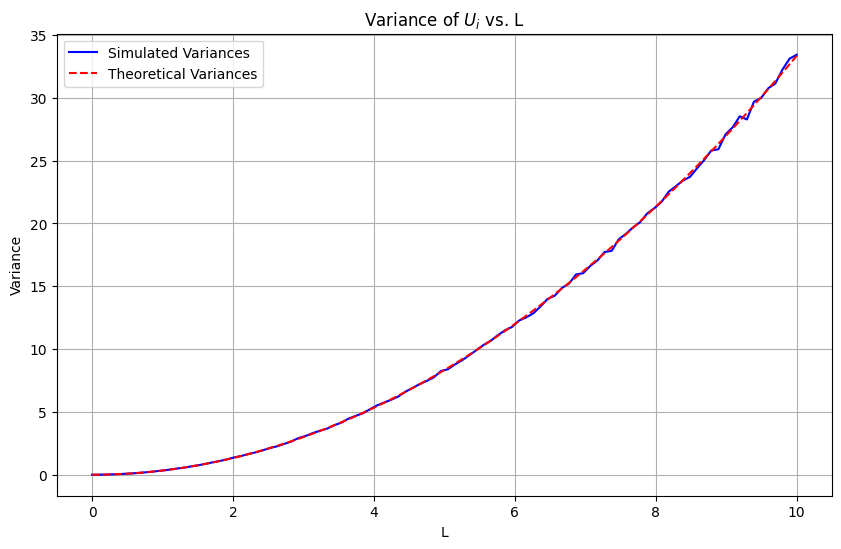

In [57]:
import matplotlib.pyplot as plt

# Define u_0
u_0 = 0

# Define a range of L values
L_values = np.linspace(0, 10, 100)

# Store the variances
variances = []

# Simulate Ui for each L and compute the variance
for L in L_values:
    U_i = np.random.uniform(u_0 - L, u_0 + L, size=10000)
    variances.append(np.var(U_i))

# Theoretical variances
theoretical_variances = L_values**2 / 3

# Plotting
plt.figure(figsize=(10,6))
plt.plot(L_values, variances, label='Simulated Variances', color='blue')
plt.plot(L_values, theoretical_variances, label='Theoretical Variances', linestyle='--', color='red')
plt.xlabel('L')
plt.ylabel('Variance')
plt.title('Variance of $U_i$ vs. L')
plt.legend()
plt.grid(True)
plt.show()

### Part B
Now consider the sum

$$
S_N = \sum_{i=1}^N U_i
$$

Use CLT to approximate $\mathbb{P}(S_N > u_0 + \frac{L}{4})$ in terms of the cumulative distribution of a Normal random variable.

### Solution
From $U_i$'s uniform distribution, we can see it has a mean of $u_0$, therefore $\mu = u_0$. We just confirmed that $U_i$ has a variance of $\frac{L^2}{3}$, therefore $\sigma^2 = \frac{L^2}{3}$.

The central limit theorem states that:

$$
S_N \sim \mathcal{N}(N\mu, N\sigma^2) \Rightarrow S_N \sim \mathcal{N}(Nu_0, N\frac{L^2}{3})
$$

Lets $Z \sim \mathcal{N}(0, 1)$ be a standard normal random variable. We may now standardize $S_N$:

$$
Z = \frac{S_N - N \mu}{\sqrt{N \sigma^2}} = \frac{S_N - N u_0}{\sqrt{N}\frac{L}{\sqrt{3}}}
$$

We want to find $\mathbb{P}(S_N > u_0 + \frac{L}{4})$.

We can standardize both sides:

$$
\mathbb{P}(S_N > u_0 + \frac{L}{4}) = \mathbb{P}(\frac{S_N - N u_0}{\sqrt{N}\frac{L}{\sqrt{3}}} > \frac{u_0 - N u_0 + 
\frac{L}{4}}{\sqrt{N}\frac{L}{\sqrt{3}}})
$$
$$
= \mathbb{P}(Z > \frac{u_0(1 - N) + \frac{L}{4}}{\sqrt{N}\frac{L}{\sqrt{3}}}) = 1 - \Phi(\frac{u_0(1 - N) + \frac{L}{4}}{\sqrt{N}\frac{L}{\sqrt{3}}})
$$


## Exercise 4.
(Model with conditional variance): Consider the model:

$$
X \sim Bernoulli(q)
$$

$$
Y \mid X \sim N(a, X + 2(1 - X))
$$

### Part A
Is this a linear regression model (for the variable $Y$) as defined in class? Are $X$ and $Y$ independent?

### Solution
We can see that $E[Y \mid X] = a$, so the mean of $Y$ is not a linear function of $X$. Therefore, this is not a linear regression model. Only the variance of $Y$ is a linear function of $X$, so this is not a linear model as we discussed in class. 

Even though this may not be a linear regression model, the distribution of $Y$ changes given different values of $X$, so $X$ and $Y$ are not independent.

### Part B
Compute $cov(X, Y)$

### Solution
Remember that $cov(X, Y) = E[XY] - E[X]E[Y]$. W

We can see that $E[X] = q$ because it is bernoulli distributed with parameter $q$. 

We can also see that $E[Y] = a$ because $Y$ is normally distributed with mean $a$.

By tower property: $E[XY] = E[X \times E[Y \mid X]]$

$$
E[Y \mid X] = a \Rightarrow E[XY] = E[X \times a] = aE[X] = aq
$$

Therefore, $cov(X, Y) = aq - aq = 0$


### Part C
Confirm your answers by making a plot of the covariance as a function of $q$ from a sample of $10000$ $(x, y)$ points.

### Solution

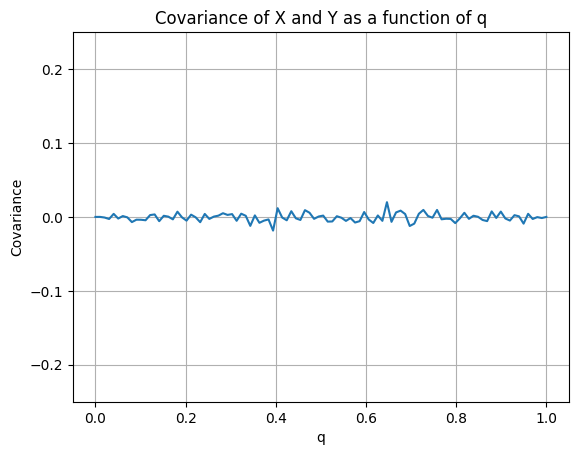

In [58]:
# Constants
a = 1.0
num_samples = 10000
q_values = np.linspace(0, 1, 100)

covariances = []

for q in q_values:
    # Generate samples for X from Bernoulli distribution
    x_samples = np.random.binomial(1, q, num_samples)
    
    # Generate samples for Y given X
    y_samples = [np.random.normal(a, x + 2*(1 - x)) for x in x_samples]
    
    # Compute the covariance for the samples
    cov = np.cov(x_samples, y_samples)[0][1]
    covariances.append(cov)

# Plot
plt.plot(q_values, covariances)
plt.xlabel('q')
plt.ylabel('Covariance')
plt.title('Covariance of X and Y as a function of q')
plt.grid(True)
plt.ylim(-0.25, .25)
plt.show()

## Exercise 5.
(Swapping response and predictor variables): Consider the conditionally normal model introduced in class:

$$
X \sim N(\mu_X, \sigma_X^2)
$$

$$
Y \mid X \sim N(\beta_1 X + \beta_0, \sigma_{Y \mid X}^2)
$$

This is a regression model for $Y$. The goal of this problem is to understand the distribution of $X$ conditioned on $Y$. That is, we would like to understand the corresponding regression model for $X$. This is important, because in some applications we have to make a choice about which variable to take as our response and which as our predictor. This exercise will help us understand how the regression parameters we infer depend on this choice. It will also sharpen our understanding of what the covariance really means.

For some additional motivation, suppose that there is no noise in $Y \mid X$ (meaning $\sigma_{Y \mid X}^2 = 0$). Then

$$
Y = \beta_1 X + \beta_0 \Rightarrow X = \frac{1}{\beta_1}Y - \frac{\beta_0}{\beta_1}
$$

So the slope of X vs Y is $\frac{1}{\beta_1}$. We could try adding a normal random variable $Z \sim N(0, \sigma_{Y \mid X}^2)$ to represent the noise in $Y \mid X$ and then solve this again. This would lead us to 

$$
Y = \beta_1 X + \beta_0 + Z \Rightarrow X = \frac{1}{\beta_1}Y - \frac{\beta_0}{\beta_1} + \frac{Z}{\beta_1}
$$

It is tempting to conclude that $Y \mid X$ follows a normal distribution with mean $\frac{Y}{\beta_1} - \frac{\beta_0}{\beta_1}$ and variance $\frac{\sigma_{Y \mid X}^2}{\beta_1^2}$. This is however false - see part (c). In this problem, you will derive the correct formula.


### Part A
Based on the formula for covariance derived in class, we know

$$
cov(X, Y) = \beta_1' \sigma_Y^2
$$

where $\beta_1'$ is the regression slope on $X$ vs. $Y$ and $\sigma_Y^2$ is the variance of $Y$. Using (1) $cov(X, Y) = cov(Y, X)$, and (2) the marginal variance of $Y$ is $\sigma_Y^2 = \beta_1^2 \sigma_X^2 + \sigma_{Y \mid X}^2$, derive a formula for $\beta_1'$.

### Solution
Using (1) we know that $cov(X, Y) = \beta_1' \sigma_Y^2 = cov(Y, X) = \beta_1 \sigma_X^2 \Rightarrow \beta_1' \sigma_Y^2 = \beta_1 \sigma_X^2$

Substituting in $\sigma_Y^2 = \beta_1^2 \sigma_X^2 + \sigma_{Y \mid X}^2$ we get:

$$
\beta_1' (\beta_1^2 \sigma_X^2 + \sigma_{Y \mid X}^2) = \beta_1 \sigma_X^2 \Rightarrow \beta_1' = \frac{\beta_1 \sigma_X^2}{\beta_1^2 \sigma_X^2 + \sigma_{Y \mid X}^2}
$$

### Part B
Using the result of part (a), show that when $\sigma_{Y \mid X}^2 \to 0$, we retrieve the "naive" formula $\beta_1' = \frac{1}{\beta_1}$.

### Solution
Plugging in $\sigma_{Y \mid X}^2 = 0$ into our formula from part (a) we get:

$$
\beta_1' = \frac{\beta_1 \sigma_X^2}{\beta_1^2 \sigma_X^2 + 0} = \frac{\beta_1 \sigma_X^2}{\beta_1^2 \sigma_X^2} = \frac{1}{\beta_1}
$$

### Part C
Why is the naive formula $\beta_1' = \frac{1}{\beta_1}$ incorrect when $\sigma_{Y \mid X}^2 > 0$? In particular, why can't we simply solve for $X$ in terms of $Y$ to obtain the regression equation? Hint: does $Y \mid X$ have the same distribution as $Y$?

### Solution
Let $\alpha > 0$ and let $\sigma_{Y \mid X}^2 = \alpha$, then we can easily see from our formula in part (a) that 
$$
\beta_1' = \frac{\beta_1 \sigma_X^2}{\beta_1^2 \sigma_X^2 + \alpha} < \frac{1}{\beta_1}
$$ 

From a higher level, when $\sigma_{Y \mid X}^2 > 0$, there is noise in the regression of $Y$ on $X$. This affects the covariance between $X$ and $Y$, impacting the regression slope of $X$ on $Y$. Since the naive formula is directly derived from this covariance, the presence of noise means the formula no longer holds true. The more the noise, the greater the deviation from the naive formula.

Also, the added noise means that $Y \mid X$ does not have the same distribution as $Y$, however the naive formula assumes that they do. This assumption comes from the fact that if $\sigma_{Y \mid X}^2 = 0$, then all of the variance in $Y$ can be explained by $X$. Therefore, the conditional distribution of $Y$ given any specific $X$ aligns with the marginal distribution of $Y$. However, when $\sigma_{Y \mid X}^2 > 0$, the distribution of $Y$ given a specific value of $X$ includes added noise, making it different than the distribution of $Y$ as a whole.

Finally, this added noise also means that we can't simply solve for $X$ in terms of $Y$ to obtain the regression equation. When $\sigma_{Y \mid X}^2 = 0$, the relationship between $X$ and $Y$ is linear and deterministic, however when $\sigma_{Y \mid X}^2 > 0$, $X \mid Y$ is non-linear due to the added noise, and so we can't simply solve for $X$ in terms of $Y$.

## Exercise 6.
(Election model and prediction): In this exercise you will work with some data on election outcomes and GDP growth. The data can be loaded with

```
df = pd.read_table("https://raw.githubusercontent.com/avehtari/ROS-Examples/master/ElectionsEconomy/data/hibbs.dat",sep="s+")
```

The columns are as follows:

**year**: Tear of the election.

**growth**: A measure of economic growth during the previous four years.

**vote share**: The vote share in percent for the incumbent.

### Part A
Fit the data to a linear regression model with economic growth as the predictor and the vote share as the response variable.

### Solution
To find the linear regression model, we need to find the slope and intercept of the least squares regression. Let $X$ denote `growth` and let $Y$ denote `vote share`. We can find the slope and intercept with the following formulas:

$$
\text{slope} = \hat{\beta}_1 = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}
$$

$$
\text{intercept} = \hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}
$$

beta_1 (slope) = 3.0605280543869307
beta_0 (intercept) = 46.247648016800795


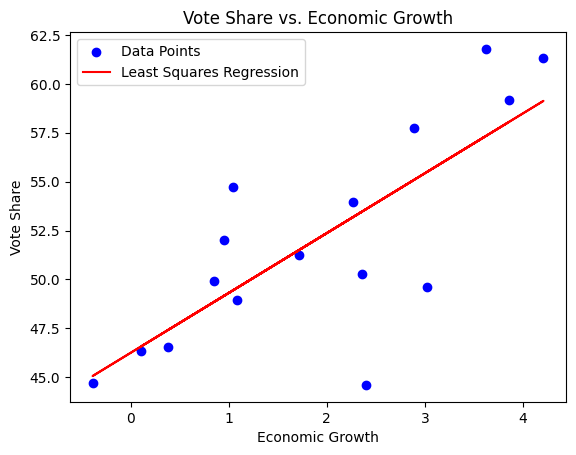

In [59]:
# Load the data
df = pd.read_table("https://raw.githubusercontent.com/avehtari/ROS-Examples/master/ElectionsEconomy/data/hibbs.dat",sep="\s+")

# Extract the predictor and response variables
X = df['growth']
Y = df['vote']

# Calculate the means of X and Y
x_bar = X.mean()
y_bar = Y.mean()

# Calculate beta_1
numerator = sum((X - x_bar) * (Y - y_bar))
denominator = sum((X - x_bar) ** 2)
beta_1 = numerator / denominator

# Calculate beta_0
beta_0 = y_bar - beta_1 * x_bar

print(f"beta_1 (slope) = {beta_1}")
print(f"beta_0 (intercept) = {beta_0}")

# Plotting
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, beta_0 + beta_1 * X, color='red', label='Least Squares Regression')
plt.title('Vote Share vs. Economic Growth')
plt.xlabel('Economic Growth')
plt.ylabel('Vote Share')
plt.legend()
plt.show()

### Part B
Based on your fitted model and neglecting any uncertainty in your estimate, what is your best estimate of the chance that the incumbent will win the election after a period when the economic growth (as measured by the growth variable) is 1.

### Solution
We are essentially looking for $E[Y | X = 1]$. We can use our linear regression model to find this:

$$
E[Y | X = 1] = \hat{\beta}_0 + \hat{\beta}_1 X = 46.2 + 3.1(1) = 49.3
$$

### Part C
What is the chance that after a period of economic `growth = 2` either incumbent will win by a margin of 2%

### Solution
Let's start by defining out distribution for $Y \mid X$. We already know $E[Y \mid X] = \hat{\beta}_0 + \hat{\beta}_1 X$. We also know that $\sigma_Y^2 = \beta_1^2 \sigma_X^2 + \sigma_{Y \mid X}^2 \Rightarrow \sigma_{Y \mid X}^2 = \sigma_Y^2 - \beta_1^2 \sigma_X^2$.

The least squared regression of $Y \mid X$ is normally distributed with mean $\hat{\beta}_0 + \hat{\beta}_1 X$ and variance $\sigma_{Y \mid X}^2 = \sigma_Y^2 - \beta_1^2 \sigma_X^2$. Therefore, we can say that: 

$$
Y \mid X \sim \mathcal{N}(\hat{\beta}_0 + \hat{\beta}_1 X, \sigma_Y^2 - \beta_1^2 \sigma_X^2)
$$

The incumbent winning by a margin of 2% implies the vote goes at least 49% to 51%, therefore we want to find $\mathbb{P}(Y \mid X = 2) > 51$. We can standardize both sides:

$$
\mathbb{P}(Y \mid X = 2 > 51) = \mathbb{P}(\frac{Y - (\hat{\beta}_0 + \hat{\beta}_1 (2))}{\sqrt{\sigma_Y^2 - \beta_1^2 \sigma_X^2}} > \frac{51 - (\hat{\beta}_0 + \hat{\beta}_1 X)}{\sqrt{\sigma_Y^2 - \beta_1^2 \sigma_X^2}}) = \mathbb{P}(Z > \frac{51 - (\hat{\beta}_0 + \hat{\beta}_1 (2))}{\sqrt{\sigma_Y^2 - \beta_1^2 \sigma_X^2}}): Z \sim \mathcal{N}(0, 1) 
$$
$$
= 1 - \Phi(\frac{51 - (\hat{\beta}_0 + \hat{\beta}_1 (2))}{\sqrt{\sigma_Y^2 - \beta_1^2 \sigma_X^2}})
$$

Let's solve this in python:

In [63]:
var_Y = np.var(Y)
var_X = np.var(X)

numerator = 51 - (beta_0 + beta_1 * 2.5)
denominator = np.sqrt(var_Y - beta_1**2 * var_X)

probability = 1 - stats.norm.cdf(numerator / denominator)

print(f"Probability of incumbent winning by margin of at least 2% after economic growth of 2 = {probability * 100:.2f}%")

Probability of incumbent winning by margin of at least 2% after economic growth of 2 = 79.49%
